In [143]:
import nltk

nltk.download("vader_lexicon")

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sent_analyzer = SentimentIntensityAnalyzer()

sent = "I am very happy today"
sent_analyzer.polarity_scores(sent)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jersey/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.0, 'neu': 0.429, 'pos': 0.571, 'compound': 0.6115}

<AxesSubplot:xlabel='created_date', ylabel='sentiment'>

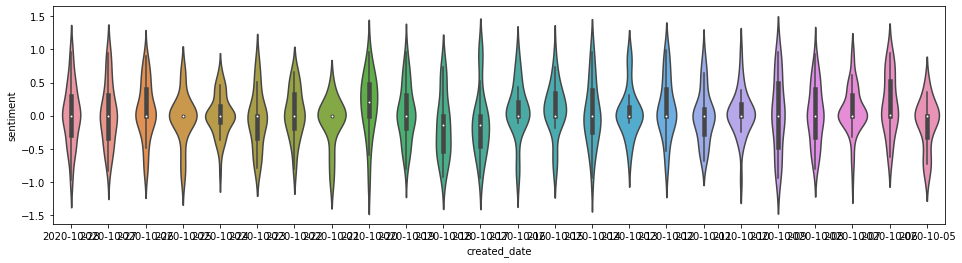

In [72]:
sample = df.query("created_date >= '2020-10-05' and created_date <= '2020-10-28'")

fig, ax = plt.subplots(figsize=(16, 4))
sns.violinplot(y="sentiment", x="created_date", data=sample)
sns.

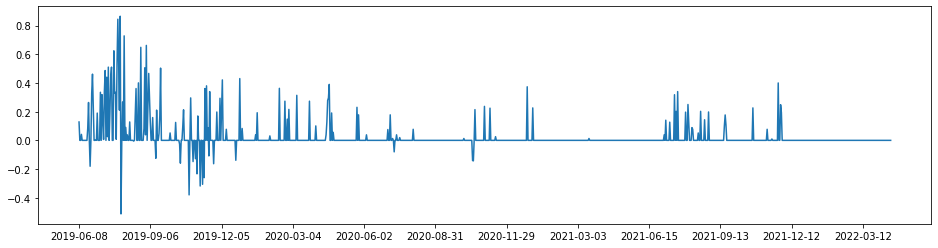

In [48]:
# plot of the median of sentiment compound scores over time
from statistics import median
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

fig, ax = plt.subplots(figsize=(16, 4))

df = pd.read_csv("posts_processed.csv")

df["sentiment"] = df["contents"].apply(lambda x: sent_analyzer.polarity_scores(x)["compound"])

median_sentiment_through_days = pd.DataFrame(df.groupby("created_date").agg({"sentiment": median}))

ax.plot(median_sentiment_through_days.index, median_sentiment_through_days["sentiment"])

ax.xaxis.set_major_locator(ticker.MultipleLocator(90)) # set x-axis major ticks to every 90 days

In [162]:
median_sentiment_through_days.query("created_date > '2019-12-30' and sentiment > 0.2").index.tolist()

['2020-02-16',
 '2020-02-23',
 '2020-02-28',
 '2020-03-09',
 '2020-03-25',
 '2020-04-17',
 '2020-04-18',
 '2020-04-19',
 '2020-05-24',
 '2020-10-20',
 '2020-11-01',
 '2020-11-08',
 '2020-12-25',
 '2021-01-01',
 '2021-07-17',
 '2021-07-19',
 '2021-07-21',
 '2021-08-03',
 '2021-08-19',
 '2021-10-24',
 '2021-11-25',
 '2021-11-28']

In [161]:
# sample = df.query("created_date == '2021-11-25'").sort_values("sentiment", ascending=False)
sample = df.query("created_date == '2021-11-25'").sort_values("num_comments", ascending=False)
sample["contents"].to_list()

["Unpopular opinions about the souls franchise you have? My unpopular opinion is that I liked Ds2 more than Ds3. I felt Ds2 was very unique and while it has a ton of problems, I honestly liked it more than the third one. The third one just felt way too much like Bloodborne 2 than Dark Souls. I also felt that it was pretty bland in it's environments compared to ones that came before. \n\nPlease share your unpopular opinions and don't harass anyone.",
 'Besides FromSoft games, what other franchise do you cherish? There’s no doubt that FromSoft delivers an experience like no other. But if you had to choose, what would be your favorite franchise after the FromSoft games. I’m asking because I’m genuinely curious about what other games people play here.\n\nI’m all about adventure and action so for me it’s the Zelda franchise, with Twilight Princess being my favorite. I grew up mostly playing Nintendo (Mario, Pokémon, so on), but Zelda is what really got me to explore outside of that platform

In [68]:
# df.groupby("created_date").agg({"valence": "count"}).plot(figsize=(16, 4))

valence = df.pivot_table(index="created_date", columns="valence", values="id", aggfunc="count")
valence.head()
# sns.barplot(y="valence", x="created_date", data=valence, color="valence")

valence,negative,neutral,positive
created_date,,,
2019-06-08,8.0,18.0,29.0
2019-06-09,3.0,15.0,9.0
2019-06-10,26.0,48.0,59.0
2019-06-11,15.0,14.0,31.0
2019-06-12,8.0,27.0,20.0


In [62]:
sent = 'Starscourge Radahn I just got to this boss fight and I’ve been able to get to phase 2 but I was just wondering if you can summon irl players for this battle if so it would help a lot'
sent_analyzer.polarity_scores(sent)
sent_analyzer.sentiment_valence(sent)

TypeError: SentimentIntensityAnalyzer.sentiment_valence() missing 4 required positional arguments: 'sentitext', 'item', 'i', and 'sentiments'

In [58]:
negs[0]

KeyError: 0

In [76]:
radahn = df.query("contents.str.contains('radahn')", engine="python")

<AxesSubplot:xlabel='created_date'>

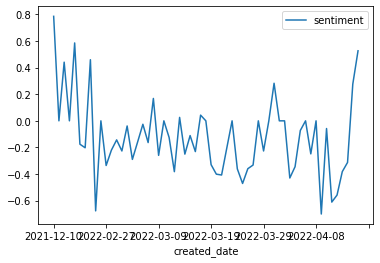

In [79]:
radahn.groupby("created_date").agg({"sentiment": median}).plot()

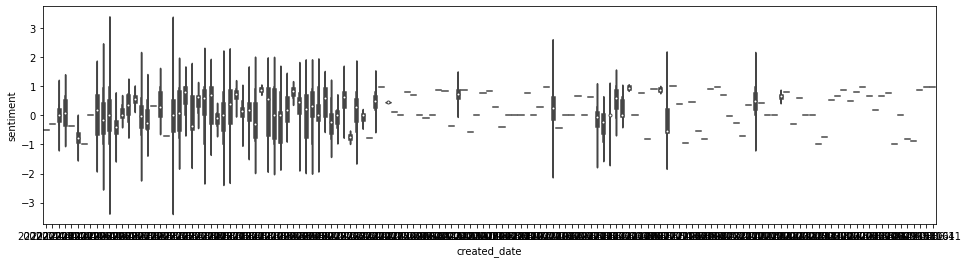

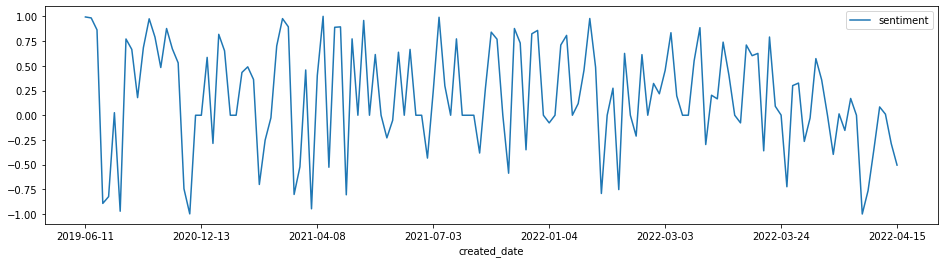

In [171]:
def median_sentiment_character(character):
    df_cha = df.query("contents.str.contains('{}')".format(character), engine="python")

    fig, ax = plt.subplots(figsize=(16, 4))

    sns.violinplot(y="sentiment", x="created_date", data=df_cha)
    df_cha.groupby("created_date").agg({"sentiment": median}).plot(figsize=(16, 4))

median_sentiment_character("berserk")

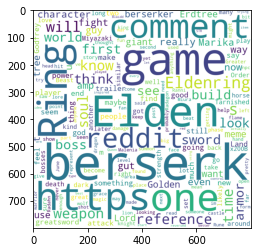

In [166]:
from wordcloud import WordCloud

df_cha = df.query("contents.str.contains('{}')".format("berserk"), engine="python")
wordcloud = WordCloud(width=800, height=800, background_color="white", collocations=False).generate(". ".join(df_cha.contents))

plt.imshow(wordcloud)

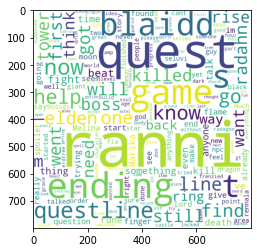

In [133]:
plt.imshow(wordcloud)

In [113]:
CHARACTERS = ["ranni", "nepheli", "blaidd", "millicent", "melina", "radahn", "godrick", "margit", "malenia", "pot boy", "fia", "patches", "jorge", "torrent", "hodir", "mimic tear", "rya", "sellen", "alexandar", "irina", "latenna", "bloody wolf"]
ALIAS = {
    "ranni": ["ranni", "renna", "snow witch"],
    "malenia": ["valkyrie", "malenia"],
    "torrent": ["yakul", "torrent"],
    "alexandar": ["alexandar", "alexander"],
    "bloddy wolf": ["bloody wolf", "raging wolf"],
}

def keyword_match(text, keyword):
    if keyword in text:
        text_subtracted = text.replace(keyword, "")
        if len(text_subtracted.split()) == len(text.split()) - len(keyword.split()):
            return True
    return False

rows_with_multi_characters = []
for index, row in df.iterrows():
    has_character = 0
    for character in CHARACTERS:
        if character in ALIAS:
            for alias in ALIAS[character]:
                if keyword_match(row.contents, alias):
                    has_character += 1
                    break

        else:
            if keyword_match(row.contents, character):
                has_character += 1  
                break

        if has_character>=2:
            rows_with_multi_characters.append(index)
            break

len(rows_with_multi_characters)


KeyboardInterrupt: 

In [116]:
# tf-idf of n-grams on different characters

import numpy as np
import pandas as pd
import scipy.sparse as sp

from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer


class CTFIDFVectorizer(TfidfTransformer):
    def __init__(self, *args, **kwargs):
        super(CTFIDFVectorizer, self).__init__(*args, **kwargs)

    def fit(self, X: sp.csr_matrix, n_samples: int):
        """Learn the idf vector (global term weights) """
        _, n_features = X.shape
        df = np.squeeze(np.asarray(X.sum(axis=0)))
        idf = np.log(n_samples / df)
        self._idf_diag = sp.diags(idf, offsets=0,
                                  shape=(n_features, n_features),
                                  format='csr',
                                  dtype=np.float64)
        return self

    def transform(self, X: sp.csr_matrix) -> sp.csr_matrix:
        """Transform a count-based matrix to c-TF-IDF """
        X = X * self._idf_diag
        X = normalize(X, axis=1, norm='l1', copy=False)
        return X


In [129]:
def contents_about_each_character():
    CHARACTERS = ["ranni", "nepheli", "melina", "radahn", "godrick", "margit", "malenia"]
    texts = []
    for character in CHARACTERS:
        df_cha = df.query("contents.str.contains('{}') and created_date >= '2022-02-25'".format(character), engine="python")
        texts.append(" ".join(df_cha.contents))
    
    docs = pd.DataFrame({"characters": CHARACTERS, "texts": texts})
    return docs

docs = contents_about_each_character()

count = CountVectorizer().fit_transform(docs.texts)
ctfidf = CTFIDFVectorizer().fit_transform(count, len(docs))

# Create bag of words
count_vectorizer = CountVectorizer().fit(docs.texts)
count = count_vectorizer.transform(docs.texts)
words = count_vectorizer.get_feature_names()

# Extract top 10 words per class
ctfidf = CTFIDFVectorizer().fit_transform(count, n_samples=len(docs)).toarray()
words_per_class = {docs.characters[label]: [words[index] for index in ctfidf[label].argsort()[-5:]] 
                   for label in range(len(docs))}

print(words_per_class)

{'ranni': ['thoughtless', 'rabbis', 'crawling', 'melinda', 'hourglass'], 'nepheli': ['dialos', 'hardship', 'borrow', 'jarburg', 'gestures'], 'melina': ['sixth', '_queen', 'frienzed', 'rituals', 'linger'], 'radahn': ['seethwater', 'situational', 'regalla', 'renellas', 'tggt5f'], 'godrick': ['godrit', 'manually', 'chikage', 'sofría', 'beem'], 'margit': ['toe', 'senic', 'sentry', 'poggers', 'rb'], 'malenia': ['ammount', 'crushers', 'lastnight', 'unbind', 'reforge']}


In [126]:
ctfidf["ranni"]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [123]:
def contents_about_each_character():
    CHARACTERS = ["ranni", "nepheli"]
    texts = []
    for character in CHARACTERS:
        df_cha = df.query("contents.str.contains('{}') and created_date >= '2022-02-25'".format(character), engine="python")
        texts.append(" ".join(df_cha.contents))
    
    docs = pd.DataFrame({"characters": CHARACTERS, "texts": texts})
    return docs

docs = contents_about_each_character()

docs.characters[0]

'ranni'

In [137]:
df.sort_values(by="score", ascending=False).head(10)

,id,created_date,contents,score,author,created_utc,url,full_link,title,selftext,upvote_ratio,num_comments,sentiment,valence
78349,tr4u8c,2022-03-29,How to enter a building like a Tarnished,15986,Phedericus,1648568362,https://i.redd.it/ul0xd81kecq81.png,https://www.reddit.com/r/Eldenring/comments/tr...,How to enter a building like a Tarnished,NaN,0.98,348,0.3612,positive
421636,nzntmp,2021-06-14,OOOOOOOOOOOHHH,8786,D1O-CAC,1623680311,https://i.redd.it/l5xkd44op8571.jpg,https://www.reddit.com/r/Eldenring/comments/nz...,OOOOOOOOOOOHHH,NaN,0.97,2306,0.0000,neutral
389259,rb5s1c,2021-12-07,"POV: its the 25th of February, 2022",7834,PsychoMUCH,1638901872,https://i.redd.it/ylwp9s6tt5481.png,https://www.reddit.com/r/Eldenring/comments/rb...,"POV: its the 25th of February, 2022",NaN,0.97,305,0.0000,neutral
420932,o0n6v3,2021-06-15,In a future not very far away...,6536,PixelatedCatMom,1623787222,https://v.redd.it/2tkuuuaejh571,https://www.reddit.com/r/Eldenring/comments/o0...,In a future not very far away...,NaN,0.97,838,0.0000,neutral
421747,nzhnww,2021-06-14,Favourite part of the trailer tbh,5941,Ludwig45,1623657478,https://i.redd.it/yle6ikurt6571.jpg,https://www.reddit.com/r/Eldenring/comments/nz...,Favourite part of the trailer tbh,NaN,0.97,386,0.0000,neutral
427189,nwwo2i,2021-06-10,ELDEN RING TRAILER! JUNARY 21 2022 &amp; INFO ...,5829,jack0641,1623354554,https://www.reddit.com/r/Eldenring/comments/nw...,https://www.reddit.com/r/Eldenring/comments/nw...,ELDEN RING TRAILER! JUNARY 21 2022 &amp; INFO,It's FINALLY HERE - Releasing January 21 2022\...,0.99,12065,0.0000,neutral
439064,lxgned,2021-03-04,The 9K people that joined after the leaks.,5090,Jaxerman5,1614849533,https://i.redd.it/1k3sdkg8bzk61.jpg,https://www.reddit.com/r/Eldenring/comments/lx...,The 9K people that joined after the leaks.,NaN,0.98,536,0.0000,neutral
443308,lbo5nm,2021-02-03,Never forget,5056,Sxcythe,1612360969,https://i.redd.it/4y25nahgr9f61.jpg,https://www.reddit.com/r/Eldenring/comments/lb...,Never forget,NaN,0.98,130,0.1695,positive
438917,lxupi0,2021-03-04,"Audio Engineer here, I managed to improve the ...",4889,theFrenchDutch,1614890435,https://v.redd.it/8u7ehayio2l61,https://www.reddit.com/r/Eldenring/comments/lx...,"Audio Engineer here, I managed to improve the ...",NaN,0.95,310,0.7003,positive
440496,lsgewk,2021-02-25,My build for today. What do you think?,4735,ThEduTM,1614285879,https://i.redd.it/63qvph87roj61.png,https://www.reddit.com/r/Eldenring/comments/ls...,My build for today. What do you think?,NaN,0.98,251,0.0000,neutral


In [139]:
sample = df[df.created_date == "2022-04-13"]
sample.sort_values(by="num_comments", ascending=False).head(10)

,id,created_date,contents,score,author,created_utc,url,full_link,title,selftext,upvote_ratio,num_comments,sentiment,valence
9548,u2piwc,2022-04-13,can anyone tell me specifically what I did tha...,1,Shoujon,1649854008,https://i.redd.it/u9l8vy5ilat81.png,https://www.reddit.com/r/Eldenring/comments/u2...,can anyone tell me specifically what I did tha...,NaN,1.0,4,-0.1531,negative
10545,u2hd1a,2022-04-13,Finding 2nd message on top of a grace is more ...,2,SkrattarDuuuh,1649821699,https://i.redd.it/tq08jyscx7t81.png,https://www.reddit.com/r/Eldenring/comments/u2...,Finding 2nd message on top of a grace is more ...,NaN,1.0,3,0.0781,positive
9544,u2pjxl,2022-04-13,What are y’all thoughts about this basic boss ...,1,Speedy193,1649854103,https://i.redd.it/wjdz0lhslat81.jpg,https://www.reddit.com/r/Eldenring/comments/u2...,What are y’all thoughts about this basic boss ...,NaN,1.0,1,0.0000,neutral
8429,u2xwnm,2022-04-13,Is Elden ring's universe connected to dark sou...,1,OfficerGalactic,1649877129,https://www.reddit.com/r/Eldenring/comments/u2...,https://www.reddit.com/r/Eldenring/comments/u2...,Is Elden ring's universe connected to dark sou...,NaN,1.0,1,0.0000,neutral
10547,u2hcdy,2022-04-13,EZ,7,Not_A_Cardboard_Box,1649821638,https://i.redd.it/hhatgi69x7t81.jpg,https://www.reddit.com/r/Eldenring/comments/u2...,EZ,NaN,1.0,1,0.3612,positive
10549,u2hc1u,2022-04-13,Does anyone know about U4gm.com? It seems like...,0,Swanz_c,1649821606,https://www.reddit.com/r/Eldenring/comments/u2...,https://www.reddit.com/r/Eldenring/comments/u2...,Does anyone know about U4gm.com? It seems like...,NaN,0.5,1,0.4329,positive
9604,u2p3me,2022-04-13,My favorite early game enemy the Omenkiller,1,genki_-,1649852581,https://i.redd.it/4px4aj49hat81.jpg,https://www.reddit.com/r/Eldenring/comments/u2...,My favorite early game enemy the Omenkiller,NaN,1.0,1,-0.1280,negative
10376,u2igm9,2022-04-13,How to create a Cleanrot Knight Build I have b...,1,SoulReaper547,1649825485,https://www.reddit.com/r/Eldenring/comments/u2...,https://www.reddit.com/r/Eldenring/comments/u2...,How to create a Cleanrot Knight Build,I have been playing Elden Ring for over 40 hou...,1.0,0,0.9115,positive
10377,u2igkf,2022-04-13,Lol my mom thinks unplugging the wifi is gonna...,1,Available-Leek-4160,1649825480,https://www.reddit.com/r/Eldenring/comments/u2...,https://www.reddit.com/r/Eldenring/comments/u2...,Lol my mom thinks unplugging the wifi is gonna...,Dont know why but mom is crazy and if im not w...,1.0,0,-0.7018,negative
10378,u2ig1j,2022-04-13,How does bleed work? All the guides tell me wh...,1,VashtheGoofball,1649825421,https://www.reddit.com/r/Eldenring/comments/u2...,https://www.reddit.com/r/Eldenring/comments/u2...,How does bleed work?,All the guides tell me what I already know. Th...,1.0,0,-0.7929,negative


<AxesSubplot:xlabel='created_date'>

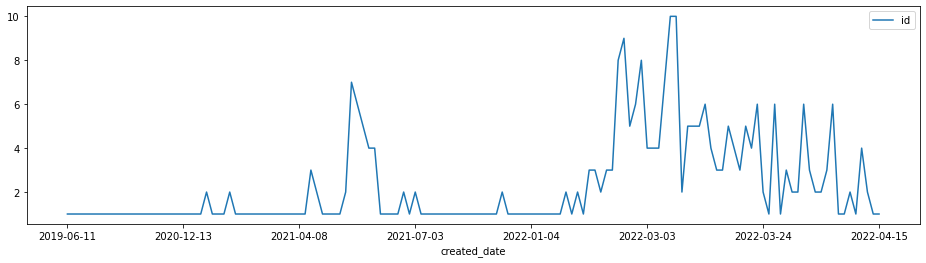

In [181]:
berserk = df.query("contents.str.contains('{}')".format("berserk"), engine="python")

berserk.groupby("created_date").count().plot(y="id", figsize=(16, 4))

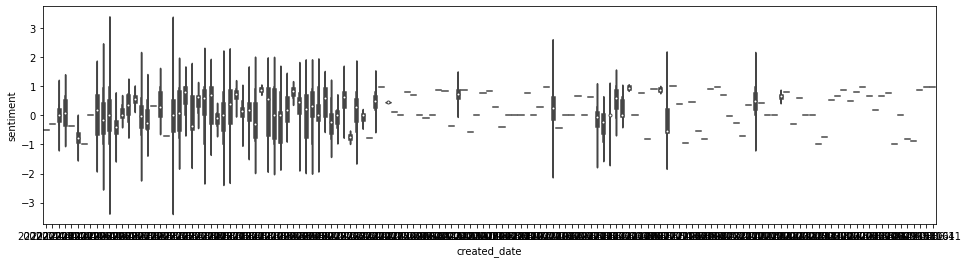

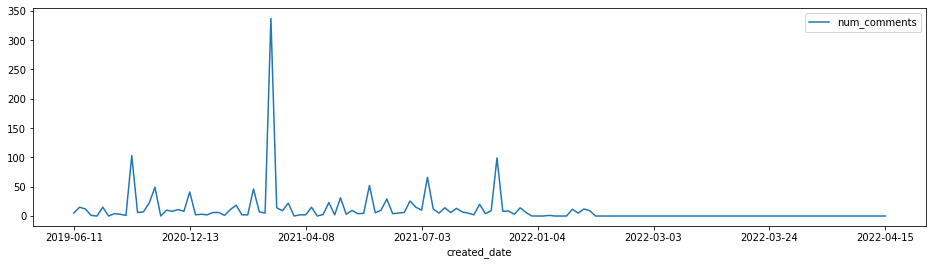

In [185]:
def median_sentiment_character(character):
    df_cha = df.query("contents.str.contains('{}')".format(character), engine="python")

    fig, ax = plt.subplots(figsize=(16, 4))

    sns.violinplot(y="sentiment", x="created_date", data=df_cha)
    df_cha.groupby("created_date").agg({"num_comments": median}).plot(figsize=(16, 4))

median_sentiment_character("berserk")